In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/karanbhutani/Downloads/IRIS.csv")

In [3]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df['species'] = df['species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ['0','1','2'])

In [9]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
df["species"].unique()

array(['0', '1', '2'], dtype=object)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = df.drop("species",axis=1)

In [13]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [14]:
y = df["species"]

In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: object

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)


In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtc = DecisionTreeClassifier()

In [19]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
train_preds = dtc.predict(X_train)

In [21]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_train, train_preds)*100

100.0

In [24]:
##overfit hogya betichod

In [26]:
testing_pred = dtc.predict(X_test)

In [27]:
testing_pred

array(['2', '1', '0', '2', '0', '2', '0', '1', '1', '1', '2', '1', '1',
       '1', '1', '0', '1', '1', '0', '0', '2', '1', '0', '0', '2', '0',
       '0', '1', '1', '0', '2', '1', '0', '2', '2', '1', '0', '2', '1',
       '1', '2', '0', '2', '0', '0'], dtype=object)

In [30]:
accuracy_score(y_test, testing_pred)*100

97.77777777777777

In [34]:
## Building a predictive system
input_data = (5.1,3.5,1.4,0.2)


In [35]:
inp_as_array = np.asarray(input_data)

In [36]:
input_reshape = inp_as_array.reshape(1,-1)
predictions = dtc.predict(input_reshape)
print(predictions)

['0']


/Users/karanbhutani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [37]:
## 0 states that it is class that was changes to 0 that is iris serota

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [39]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [42]:
feature_names = x.columns

In [43]:
feature_names

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

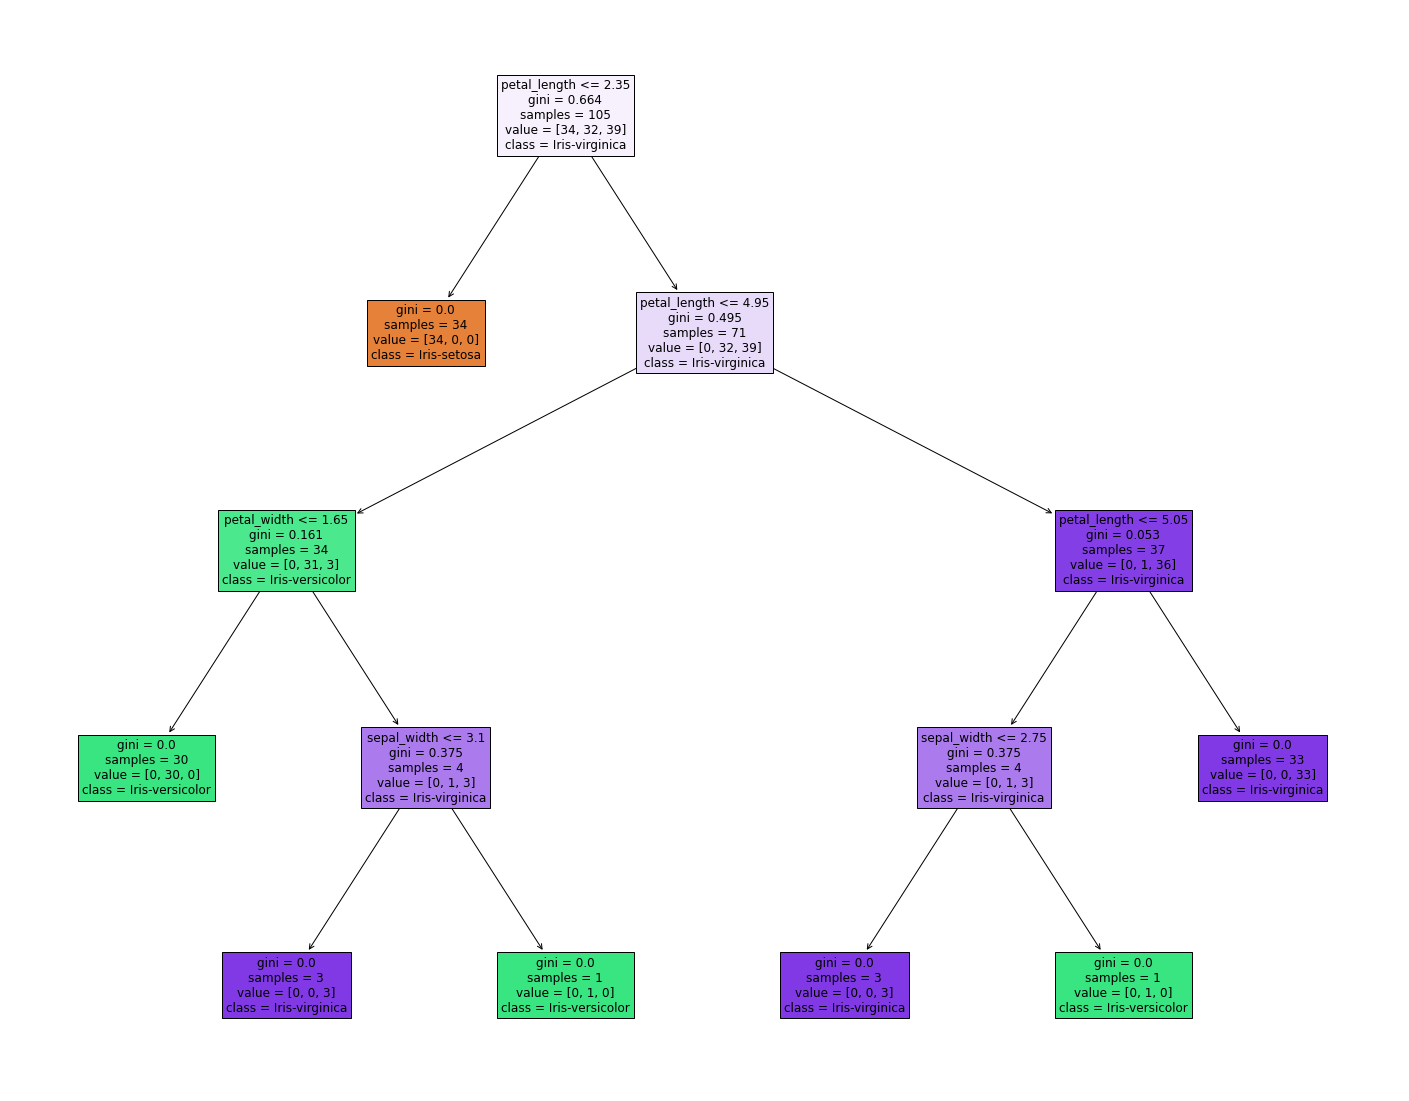

In [44]:
from sklearn import tree
from matplotlib import pyplot as plt 
fog = plt.figure(figsize =(25,20))
_= tree.plot_tree(clf, 
                 feature_names = feature_names,
                 class_names = {0 :'Iris-setosa', 1 :'Iris-versicolor', 2 :'Iris-virginica'},filled=True, fontsize =12)
